In [124]:
from datetime import date
from random import uniform
import importlib
import matplotlib.pyplot as plt
from pynet import *
from stockmanager import *

importlib.reload(util)
importlib.reload(portfolio)
importlib.reload(stock)
importlib.reload(network)
importlib.reload(netutil)

<module 'pynet.netutil' from '/Users/xlanzhou/Desktop/Richard/stocks/pynet/netutil.py'>

In [125]:
ntw = network.Network(30, [30], 30)

ntw.train(
    [[stockData[j] for j in range(i, i + 30)] for i in range(len(stockData[:300]))],
    [[a[i]] * 30 for i in range(len(a[:300]))],
    0.1
)

print(ntw.test(
    [[stockData[j] for j in range(i, i + 30)] for i in range(len(stockData[300:400]))],
    [[a[i]] * 30 for i in range(len(a[300:400]))],
))

print(ntw)

0%
5%
10%
15%
20%
25%
30%
35%
40%
45%
50%
55%
60%
65%
70%
75%
80%
85%
90%
95%
100%
0.02659592141878032
Network of size 3:
	Layer of size 30:
		<25.9>
		<26.07>
		<25.8>
		<25.81>
		<25.79>
		<25.43>
		<25.37>
		<25.51>
		<25.4>
		<25.51>
		<25.43>
		<25.31>
		<25.36>
		<25.26>
		<25.04>
		<25.04>
		<25.11>
		<25.15>
		<25.07>
		<25.31>
		<25.04>
		<25.05>
		<25.07>
		<25.09>
		<24.84>
		<24.71>
		<24.98>
		<24.7>
		<24.65>
		<25.09>
	Layer of size 30:
		<8.987575053389502e-64>
		<8.987575053389502e-64>
		<8.987575053389502e-64>
		<8.987575053389502e-64>
		<8.987575053389502e-64>
		<8.987575053389502e-64>
		<8.987575053389502e-64>
		<8.987575053389502e-64>
		<8.987575053389502e-64>
		<8.987575053389502e-64>
		<8.987575053389502e-64>
		<8.987575053389502e-64>
		<8.987575053389502e-64>
		<8.987575053389502e-64>
		<8.987575053389502e-64>
		<8.987575053389502e-64>
		<8.987575053389502e-64>
		<8.987575053389502e-64>
		<8.987575053389502e-64>
		<8.987575053389502e-64>
		<8.987575053389502e-64

In [127]:
ntw = network.Network(2, [2], 2)

ntw.train(
    [[uniform(-1, 1), uniform(-1, 1)] for _ in range(10000)],
    [[0.5, 0.8] for _ in range(10000)],
    0.1
)

print(ntw.test(
    [[uniform(-1, 1), uniform(-1, 1)] for _ in range(100)],
    [[0.5, 0.8] for _ in range(100)],
))

print(ntw)

0%


IndexError: list index out of range

In [158]:
p = portfolio.Portfolio(1000000)
p.buy('AAPL', 5, date(2016, 5, 4))
p.buy('AAPL', 12, date(2016, 7, 5))
print(p)

---------------------------------------------
Ticker	Amount	Total value	Total profit
AAPL	5	579.1		105.33
AAPL	12	1389.84		252.78
Cash: 998389.17
---------------------------------------------


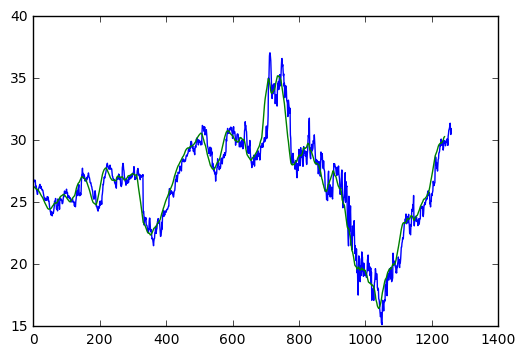

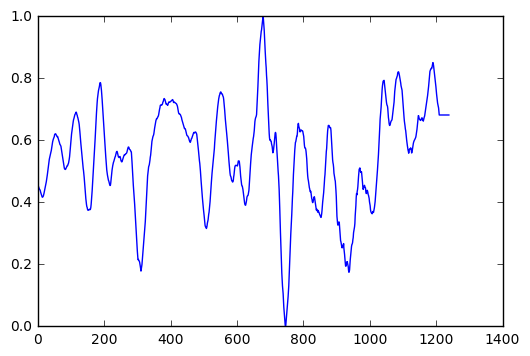

In [3]:
stockData = [item[4] for item in util.getStockPrice('MSFT', date(2005, 1, 4), date(2010, 1, 4))]
sma = util.calculateSMA(stockData, 20)
plt.plot(stockData)
plt.plot(sma)
plt.show()

a = util.createTrainingData('MSFT', date(2005, 1, 4), date(2010, 1, 4), 30, 20)
plt.plot(a)
plt.show()

In [19]:
stockClose = util.getStockClose('AAPL', date(2016, 1, 4), date(2017, 1, 1))
stockOut = util.createTrainingData('AAPL', date(2016, 1, 4), date(2017, 1, 1), 30, 8)


252


In [61]:
util.downloadStockData('MSFT', date(2005, 1, 4), date(2010, 1, 4))

1259
